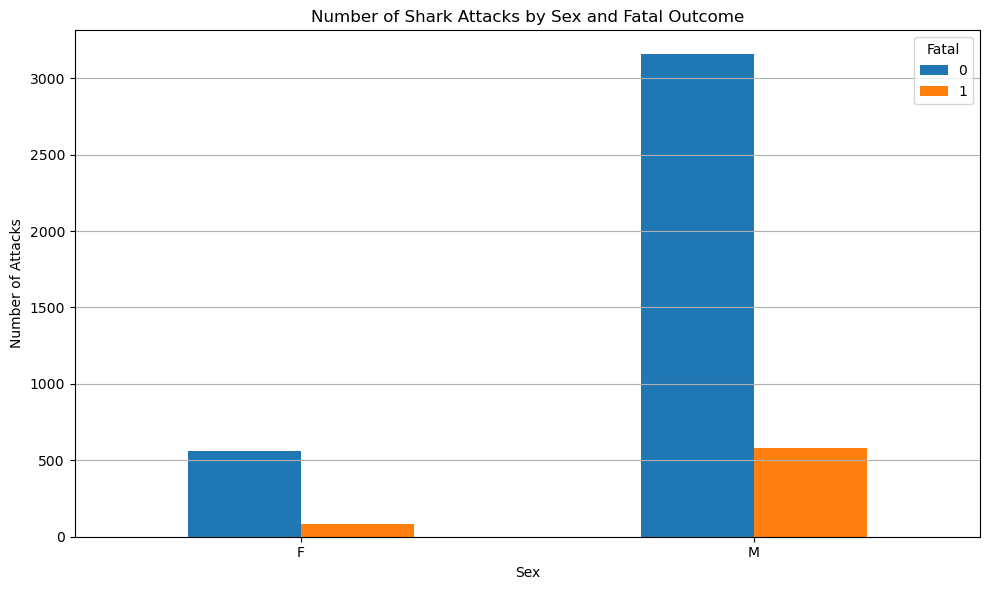

['Australia' 'United States' 'Bahamas' 'Puerto Rico' 'French Polynesia'
 'Spain' 'Canary Islands' 'South Africa' 'Vanuatu' 'Jamaica' 'Israel'
 'Mexico' 'Maldives' 'Philippines' 'Turks And Caicos Islands' 'Mozambique'
 'New Caledonia' 'Egypt' 'Thailand' 'New Zealand' 'Honduras' 'Indonesia'
 'Morocco' 'Belize' 'Trinidad And Tobago' 'India' 'Portugal' 'Samoa'
 'Colombia' 'Ecuador' 'Cuba' 'Brazil' 'Fiji' 'United Kingdom' 'Japan'
 'Other/Region' 'Canada' 'Jordan' 'St Kitts' 'Saint Martin' 'Seychelles'
 'Papua New Guinea' 'Reunion' 'China' 'Ireland' 'Italy' 'Costa Rica'
 'Malaysia' 'Libya' 'Mauritius' 'Solomon Islands' 'Saint Helena'
 'United Arab Emirates' 'Dominican Republic' 'Aruba' 'Greece' 'France'
 'Kiribati' 'Taiwan' 'Palestinian Territories' 'Nigeria' 'Tonga' 'Chile'
 'Kenya' 'Russia' 'International Waters' 'South Korea' 'Malta' 'Vietnam'
 'Madagascar' 'Panama' 'Somalia' 'Guam' 'Croatia' 'Norway' 'Yemen'
 'Sierra Leone' 'Venezuela' 'Uruguay' 'Micronesia' 'Tanzania'
 'Marshall Islands

In [2]:
# Import file and requred libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sharks = pd.read_excel('GSAF5.xls')



#sharks = pd.read_excel('c:\Users\igrav\Desktop\ironhack\Week2\Mini_Pro_2')

# Cleaning Data Frame deleting unnessesary columns
sharks = sharks.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Injury', 'Species ','Name'], axis=1)

# Cleaning Age Column

sharks['Age'] = sharks['Age'].astype(str)


# Convert '30+' and similar formats
sharks['Age'] = sharks['Age'].apply(lambda x: x.replace('+', '') if '+' in x else x)

# Replace '?' with NaN
sharks['Age'] = sharks['Age'].replace('?', np.nan)

# At this point, convert the column to numeric, coercing errors into NaN
sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')

# fill NaN with the mean age
mean_age = sharks['Age'].mean()
sharks['Age'] = sharks['Age'].fillna(mean_age)
sharks['Age'] = sharks['Age'].astype(int)


# Cleaning Fatal column and created new one
fatal_mapping = fatal_mapping = {
    ' N':'N',  'n':'N', 'Nq':'N', 'N':'N', 'N ':'N',
    2017:'Y', 'Y x 2':'Y', 'y':'Y', 'F':'Y', 'M':'Y'
}

sharks['Fatal Y/N'] = sharks['Fatal Y/N'].map(fatal_mapping).fillna(sharks['Fatal Y/N'])

fatal_mapping = {'N': 0, 'Y': 1, 'UNKNOWN': 1}  # Mapping value for continuity

# Apply mapping
sharks['Fatal'] = sharks['Fatal Y/N'].map(fatal_mapping)

# Drop rows with NaN values
sharks.dropna(subset=['Fatal'], inplace=True)

# Convert to int
sharks['Fatal'] = sharks['Fatal'].astype(int)

# Cleaning Sex
sex_mapping = sex_mapping = {
    'M':'M',' M':'M','M ':'M','m':'M', 'M x 2':'M', 'N':'M',
    'F':'F', 'F ':'F', '.':'F', 'lli':'F'
}

sharks['Sex'] = sharks['Sex'].map(sex_mapping).fillna(sharks['Sex'])


# Cleaning year
sharks['Year'] = sharks['Year'].astype(str).str.replace(r'\.0$', '', regex=True)

# Step 2: Replace or fill NaNs if necessary before converting
sharks['Year'] = sharks['Year'].replace('nan', np.nan)  # Ensure 'nan' strings become actual NaNs
sharks['Year'] = sharks['Year'].ffill()  # Forward fill NaNs; choose a method to handle them

# Step 3: Convert 'Year' to integer type (Optionally, nullable integer dtype)
sharks['Year'] = sharks['Year'].astype('Int64')
sharks = sharks[(sharks['Year'] >= 1950) & (sharks['Year'] <= 2025)]


# Cleaning Activity
sharks['Activity'] = sharks['Activity'].str.lower().str.strip()


def categorize_activity(activity):
    if pd.isna(activity):
        return 'Unknown'

    if 'surf' in activity:
        return 'surfing'
    elif 'snorkel' in activity:
        return 'snorkeling'
    elif 'swim' in activity or 'bath' in activity:
        return 'swimming'
    elif 'fish' in activity or 'spear' in activity or 'angl' in activity or 'kayak fish' in activity:
        return 'fishing'
    elif 'dive' in activity or 'scuba' in activity or 'free diving' in activity:
        return 'diving'
    elif 'wade' in activity:
        return 'wading'
    elif 'board' in activity or 'boogie board' in activity or 'paddleboard' in activity:
        return 'boarding'
    elif 'kayak' in activity or 'canoe' in activity:
        return 'kayaking'
    elif 'standing' in activity or 'floating' in activity:
        return 'floating/standing'
    else:
        return 'Other'

# Apply categorization with improved handling
sharks['Activity_Categorized'] = sharks['Activity'].apply(categorize_activity)


activities_of_interest = [
    'surfing', 'snorkeling', 'swimming', 'fishing',
    'diving', 'wading', 'boarding', 'kayaking', 'floating/standing', 'Other'
]

#Cleaning State and Location

#Handling null values
#Check all null values
sharks.isnull().sum().sort_values(ascending=False)
#Check for null values in “State” and “Location” column
sharks[['State', 'Location']].isnull().sum()
#Drop rows where both are null
sharks.dropna(subset=['State', 'Location'], how='all', inplace=True)
#Manipulate Strings (clean messy text)
sharks['State'] = sharks['State'].str.strip().str.title()
sharks['Location'] = sharks['Location'].str.strip().str.title()

#Replace inconsistent or unwanted text
#For “State”
state_map = {
    '“NSW': 'New South Wales',
    'Atlantic Ocean near Big Grand Cay': 'Big Grand Cay',
    'Milne Bay  Province': 'Maline Bay',
    'Near five Cays settlement West Caicos': 'West Caicos',
    '?': 'Unknown',
    'Between New Ireland & New Britain': 'Offshore New Ireland and New Britain',
    'Ba Ria-Vung Tau  Province': 'Ba Ria-Vung Tau Province',
    'nan' : 'Unknown'
}
sharks['State'] = sharks['State'].replace(state_map)

#For “Location”
location_map = {
    'Panama Bay 8ºN, 79ºW': 'Panama Bay',
    'Horseshoe reef Key Largo': 'Horseshoe Reef Key Largo',
    'North of Grand Bahama near Freeport': 'North of Grand Bahama',
    'Below the English fort, Trincomalee': 'Trincomalee',
    'Seacliff beach Adelaide': 'Seacliff Adelaide',
    'Somewhere between Hatteras and Beaufort': 'Hatteras and Beaufort',
    'Vũng Tàu': 'Vung Tau',
    'Durban': 'Durban'
}
sharks['Location'] = sharks['Location'].replace(location_map)

#Format the Data (standardize text types)
sharks['State'] = sharks['State'].astype(str)
sharks['Location'] = sharks['Location'].astype(str)

group_sex_age = sharks.groupby(['Sex', 'Fatal']).agg({'Age':['count', 'mean']})


# Extract the 'count' data from the MultiIndex columns
age_counts = group_sex_age['Age']['count'].unstack()

# Create the bar chart
age_counts.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Number of Shark Attacks by Sex and Fatal Outcome')
plt.xlabel('Sex')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.legend(title='Fatal', loc='upper right')
plt.grid(axis='y')

# Display the chart
plt.tight_layout()
plt.show()

# 1. Fill missing values (will handle 'Nan' later)
sharks['Country'] = sharks['Country'].fillna('Unknown')
# 2. Convert to string, strip whitespace, split slashes, title case
sharks['Country'] = sharks['Country'].astype(str).str.split('/').str[0].str.strip().str.title()
# 3. Standardize known duplicates / alternative spellings
country_replacements = {
    'Maldive Islands': 'Maldives',
    'Maldive Island': 'Maldives',
    'Trinidad & Tobago': 'Trinidad And Tobago',
    'Tobago': 'Trinidad And Tobago',
    'Trinidad': 'Trinidad And Tobago',
    'St. Martin': 'Saint Martin',
    'St Martin': 'Saint Martin',
    'St. Maartin': 'Saint Martin',
    'St Kitts / Nevis': 'Saint Kitts And Nevis',
    'St Helena, British Overseas Territory': 'Saint Helena',
    'Reunion Island': 'Reunion',
    'Turks & Caicos': 'Turks And Caicos Islands',
    'Turks And Caicos': 'Turks And Caicos Islands',
    'Bahrein': 'Bahrain',
    'Ceylon': 'Sri Lanka',
    'Ceylon (Sri Lanka)': 'Sri Lanka',
    'Burma': 'Myanmar',
    'British West Indies': 'Caribbean',
    'British Isles': 'United Kingdom',
    'England': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'British Virgin Islands': 'Virgin Islands, British',
    'Usa': 'United States',
    'Hawaii': 'United States',
    'Georgia': 'United States',
    'Mexico ': 'Mexico',
    'MeXico': 'Mexico',
    'Nicaragua ': 'Nicaragua',
    'Philippines ': 'Philippines',
    'Columbia': 'Colombia',
    'United Arab Emirates (Uae)': 'United Arab Emirates',
    'Western Samoa': 'Samoa',
    'Virgin Islands, British': 'British Virgin Islands',
    'New Guinea': 'Papua New Guinea',
    'Nan': None,
    'Sudan?': 'Sudan',
    'Federated States Of Micronesia': 'Federated States of Micronesia'
}
sharks['Country'] = sharks['Country'].replace(country_replacements)
# 4. Recategorize non-country / vague geographic entries
non_countries = [
    'Atlantic Ocean', 'Pacific Ocean', 'Indian Ocean', 'Red Sea',
    'Tasman Sea', 'Mediterranean Sea', 'Caribbean Sea', 'South China Sea',
    'North Atlantic Ocean', 'South Atlantic Ocean', 'Gulf Of Aden',
    'Ocean', 'Central Pacific', 'Bay Of Bengal', 'Mid-Atlantic Ocean',
    'North Pacific Ocean', 'South Pacific Ocean',
    'International Waters', 'The Balkans', 'Persian Gulf', 'Northern Arabian Sea', 'Coral Sea', 'Andaman',
    'Diego Garcia', 'Johnston Island', 'New Britain', 'Azores'
]
sharks['Country'] = sharks['Country'].replace(non_countries, 'International Waters')
vague_regions = ['British Overseas Territory', 'Mid Atlantic Ocean', 'Admiralty Islands',
                 'Caribbean', 'North Sea', 'Nevis', 'Okinawa', 'Grand Cayman']
sharks['Country'] = sharks['Country'].replace(vague_regions, 'Other/Region')
# 5. Final strip and title case (ensure consistency)
sharks['Country'] = sharks['Country'].str.strip().str.title()
# 6. Optional: verify unique entries
print(sharks['Country'].unique())

group_country_fatal = sharks.groupby(['Country']).agg({'Fatal':['count', 'mean']})



In [3]:
sharks

,Date,Year,Type,Country,State,Location,Activity,Sex,Age,Fatal Y/N,Time,Source,Fatal,Activity_Categorized
0,6th September,2025,Unprovoked,Australia,Nsw,Long Reef Sydney,surfing,M,57,Y,0930hrs,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,1,surfing
1,1st September,2025,Unprovoked,United States,Florida,Horseshoe Reef Key Largo,snorkeling,M,8,N,1524hrs,Todd Smith: US SUN: NY Post: The Guardian: Peo...,0,snorkeling
2,30th August,2025,Unprovoked,United States,Texas,Galveston,swimming,F,8,N,Not stated,Bob Myatt GSAF : People:,0,swimming
3,18th August,2025,Unprovoked,Australia,Nsw,Cabarita Beach,surfing,M,28,N,0730hrs,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,0,surfing
4,17th August,2025,Unprovoked,Bahamas,Atlantic Ocean Near Big Grand Cay,North Of Grand Bahama Near Freeport,spearfishing,M,63,N,1300hrs,Ralph Collier GSAF and Kevin MCMurray Tracking...,0,fishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,Summer 1950,1950,Unprovoked,Greece,nan,"Piraeus, Athens",swimming,NaN,28,Y,NaN,"V.M. Coppleson (1958), p.259; L. Schultz & M. ...",1,swimming
5224,1950,1950,Unprovoked,Singapore,Singapore Harbor,nan,diving for coins,M,28,Y,NaN,"V.M. Coppleson (1958), p.148",1,Other
5225,1950,1950,Unprovoked,New Caledonia,North Province,"Voh, Near Meatworks","spearfishing, but walking carrying fish on end...",M,28,N,NaN,"V.M. Coppleson (1958), p.262; V.M. Coppleson (...",0,fishing
5226,Ca. 1950,1950,Unprovoked,New Caledonia,North Province,Mangalia Reef Above Touho,"helmet diving, collecting trochus shell",M,28,N,NaN,"V.M. Coppleson (1958), pp.98 & 262",0,Other


In [4]:
sharks.to_csv('Sharks.csv', index=False)